# 学生食堂就餐行为可视化与分析建议

## 可视化

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
#提高分辨率
%config InlineBackend.figure_format='retina'
import warnings
warnings.filterwarnings('ignore')
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=20)

In [56]:
#数据读取
data = pd.read_csv('task1_2_1.csv',encoding='gbk')
data.head(3)

,序号,校园卡号,性别,专业名称,门禁卡号,流水号,校园卡编号,消费时间,消费金额,存储金额,余额,消费次数,消费类型,消费项目编码,操作编码,消费地点
0,1,180001,男,18国际金融,19762330,117331517.0,20181.0,2019-04-21 18:30:00,7.0,0.0,28.4,206.0,消费,41.0,249.0,第四食堂
1,1,180001,男,18国际金融,19762330,117341866.0,20181.0,2019-04-22 09:40:00,3.5,0.0,24.9,207.0,消费,19.0,236.0,第一食堂
2,1,180001,男,18国际金融,19762330,117154618.0,20181.0,2019-04-10 16:42:00,11.0,0.0,2.7,189.0,消费,82.0,18.0,第四食堂


### 各食堂就餐人数占比

In [57]:
canteen1 = data["消费地点"].apply(str).str.contains("第一食堂").sum()
canteen2 = data["消费地点"].apply(str).str.contains("第二食堂").sum()
canteen3 = data["消费地点"].apply(str).str.contains("第三食堂").sum()
canteen4 = data["消费地点"].apply(str).str.contains("第四食堂").sum()
canteen5 = data["消费地点"].apply(str).str.contains("第五食堂").sum()

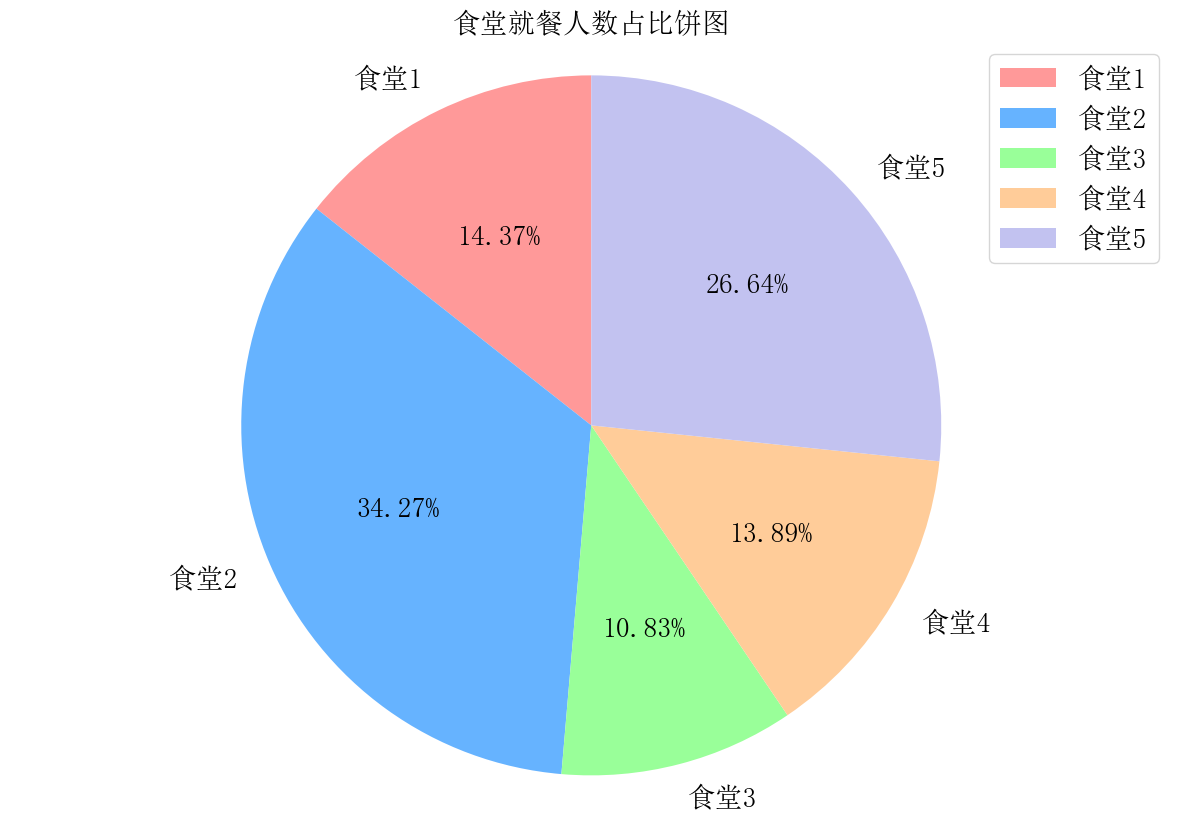

In [146]:
#绘制饼图
canteen_name=['食堂1','食堂2','食堂3','食堂4','食堂5']
man_count = [canteen1,canteen2,canteen3,canteen4,canteen5]
#创建画布
plt.figure(figsize=(15,10),dpi=50)
# 绘制饼图
# 自定义颜色列表
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0']
# 创建画布
# 绘制饼图
plt.pie(man_count, labels=canteen_name, autopct='%.2f%%', shadow=False, startangle=90, textprops={'fontproperties': font}, colors=colors)
# 显示图例
plt.legend(prop=font, fontsize=20)
# 设置标题
plt.title("食堂就餐人数占比饼图", fontproperties=font)
# 保持饼图为正圆形
plt.axis('equal')
# 显示图形
plt.show()

**各食堂流量分布**：食堂2占比最高，其次是食堂5，两者占比超60%，应该是校园的主要就餐场所。然而食堂3占比最低，可能存在一些吸引力不足或者食堂很小容量小的限制问题

### 各食堂消费金额占比

In [147]:
canteen_name=['第一食堂','第二食堂','第三食堂','第四食堂','第五食堂']
#按食堂分组，计算总金额
canteen_spending = data.groupby("消费地点")["消费金额"].sum()
canteen_spending = canteen_spending.loc[canteen_name]
canteen_spending

消费地点
第一食堂     81504.61
第二食堂    188933.94
第三食堂    127923.71
第四食堂    218708.90
第五食堂    170070.32
Name: 消费金额, dtype: float64

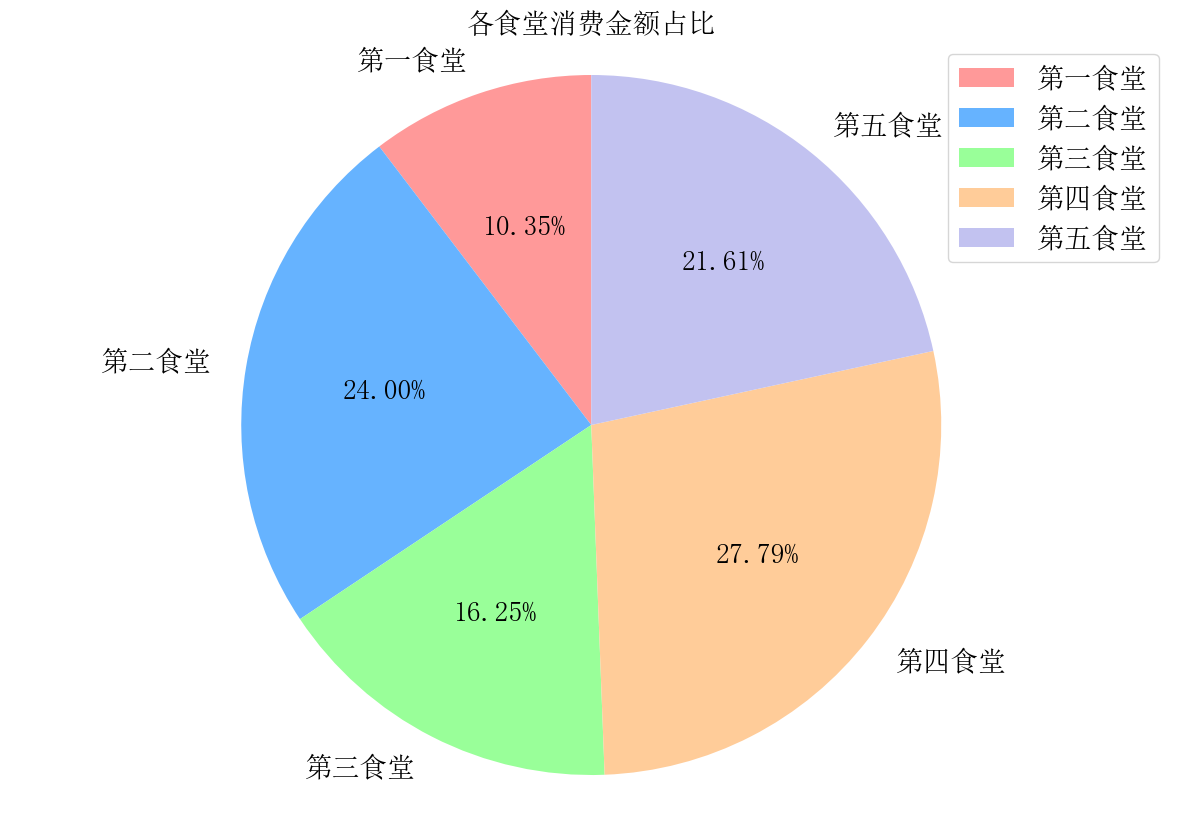

In [148]:
#创建画布
plt.figure(figsize=(15,10),dpi=50)
# 绘制饼图
plt.pie(canteen_spending, labels=canteen_spending.index, autopct='%.2f%%', shadow=False, startangle=90, textprops={'fontproperties': font}, colors=colors)
# 显示图例
plt.legend(prop=font, fontsize=20)
# 设置标题
plt.title("各食堂消费金额占比", fontproperties=font)
# 保持饼图为正圆形
plt.axis('equal')
# 显示图形
plt.show()

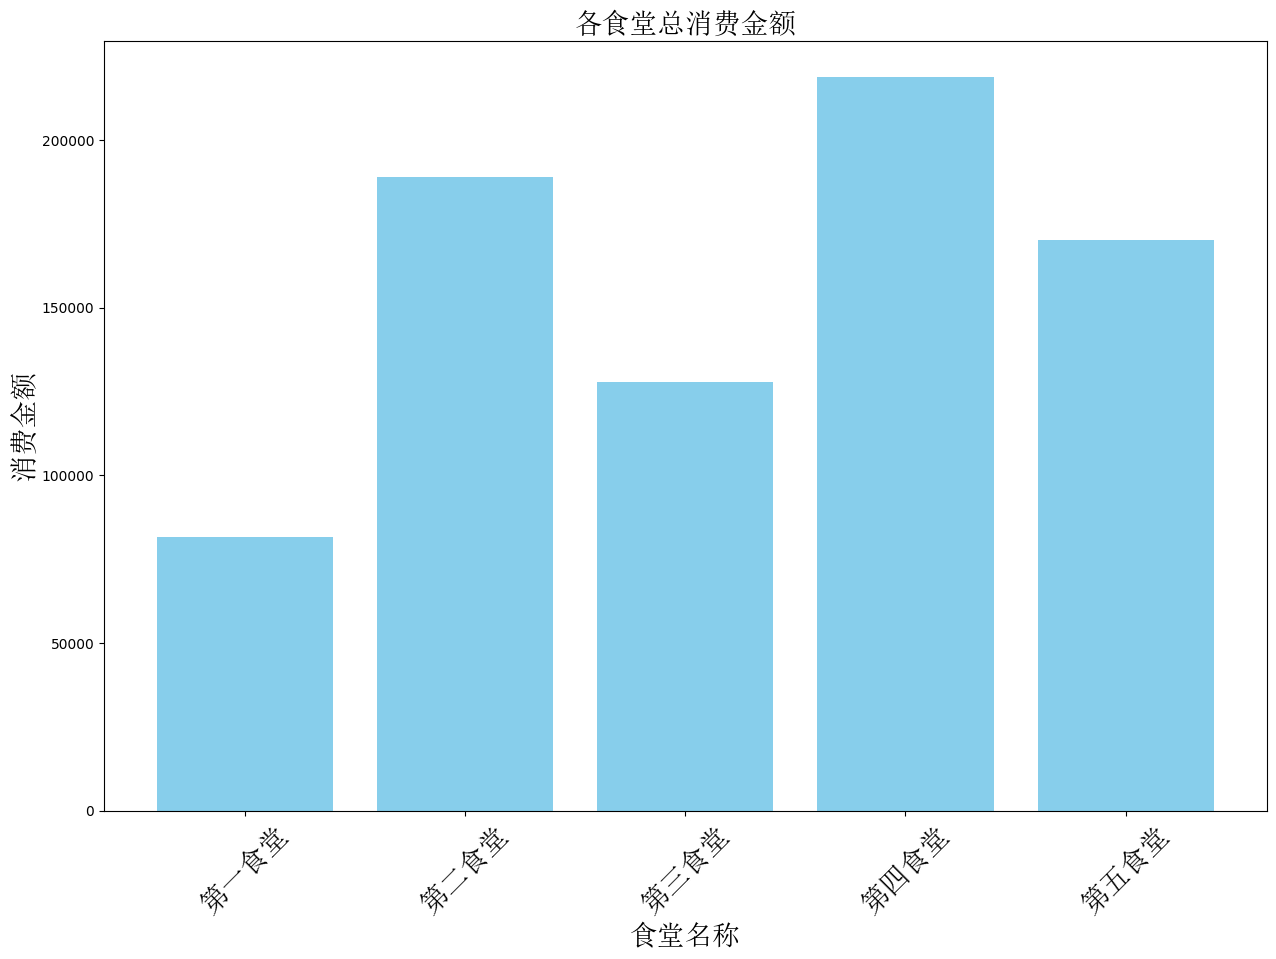

In [149]:
# 绘制柱状图
plt.figure(figsize=(15,10),dpi=50)
plt.bar(canteen_spending.index, canteen_spending.values, color='skyblue')
plt.title("各食堂总消费金额", fontproperties=font)
# x,y轴标签
plt.xlabel('食堂名称', fontproperties=font)
plt.ylabel('消费金额', fontproperties=font)
plt.xticks(rotation=45, fontproperties=font)
plt.show()

**流量与消费能力对比**

食堂4虽然就餐人数占比只有13.89%，位居倒数第二名，但是消费金额却是最高的，可以说明其客单价高或者是高端食堂

食堂2流量是最大的，但消费金额位居第二，低于食堂四，可能主打的是平价食堂

### 各食堂消费次数

In [95]:
# 按食堂分组，计算总消费次数
canteen_count = data.groupby("消费地点")["消费次数"].count()
canteen_count = canteen_count.loc[canteen_name]
canteen_count

消费地点
第一食堂    30263
第二食堂    72151
第三食堂    22806
第四食堂    29247
第五食堂    56086
Name: 消费次数, dtype: int64

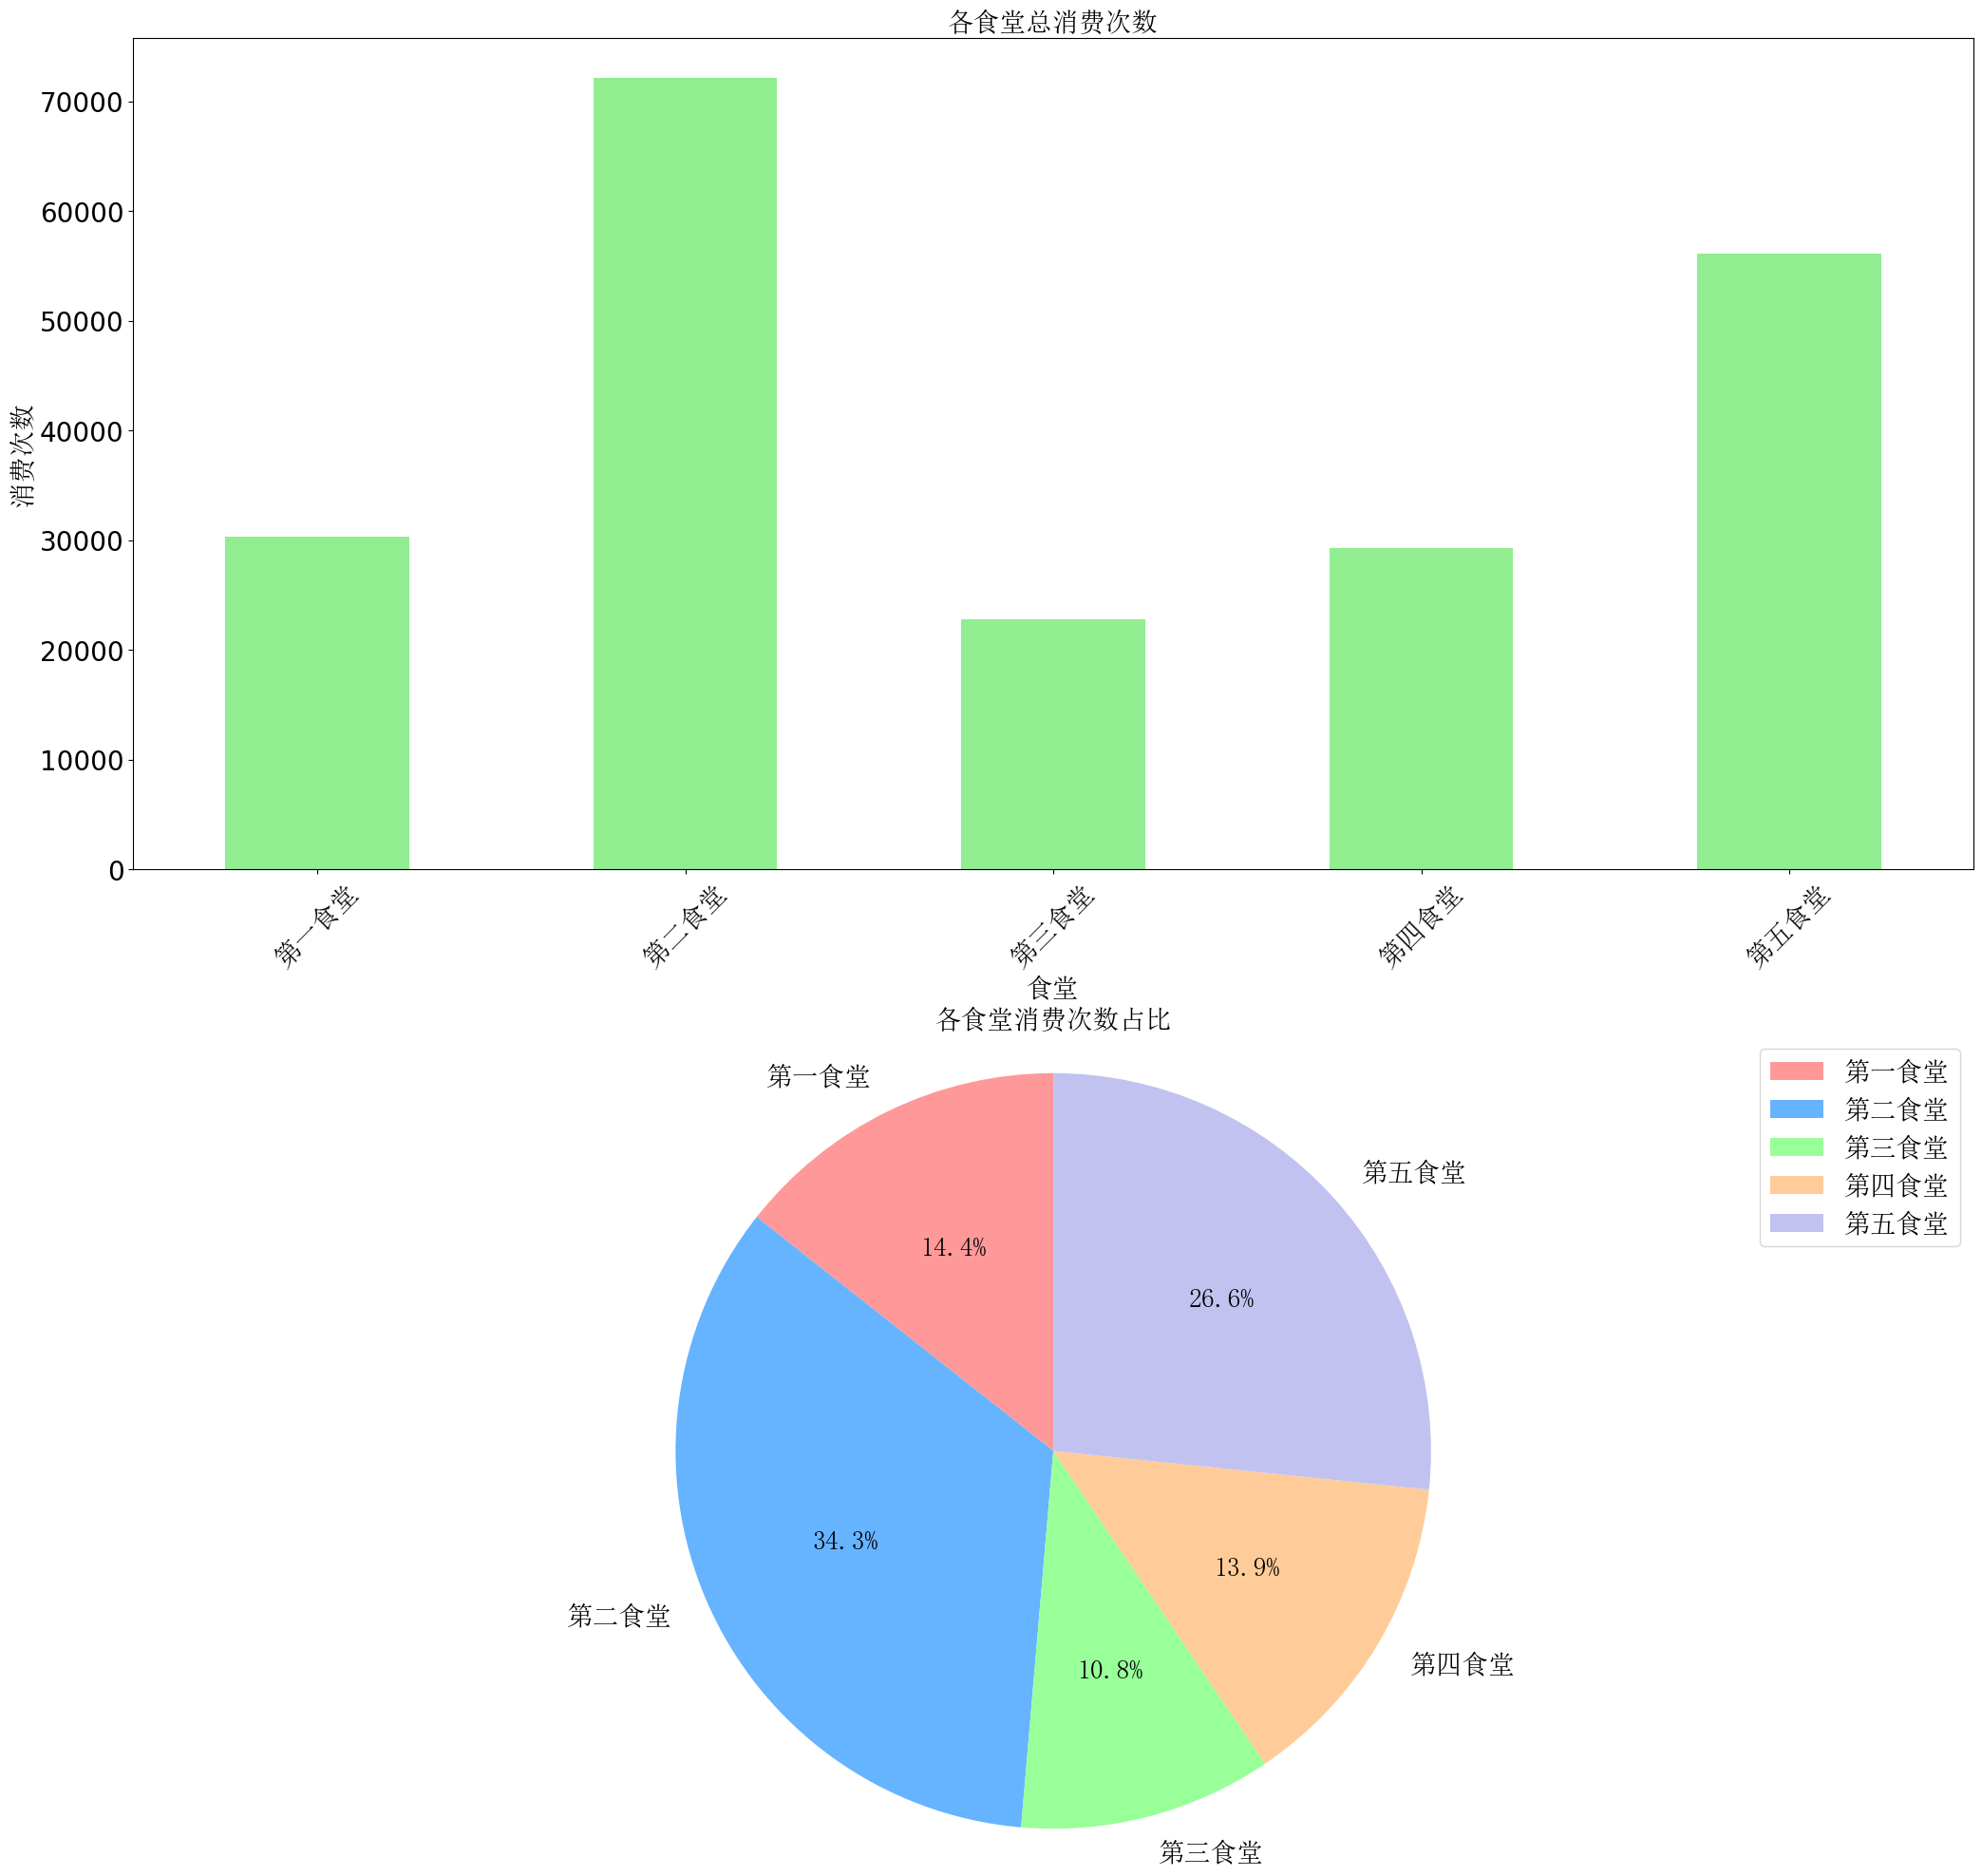

In [170]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25,25), dpi=50)

# 绘制第一个子图：柱状图
canteen_count.plot(kind='bar', color='lightgreen', ax=ax1)
ax1.set_title("各食堂总消费次数", fontproperties=font)
ax1.set_xlabel("食堂", fontproperties=font)
ax1.set_ylabel("消费次数", fontproperties=font)

# 设置刻度标签的字体属性
for label in ax1.get_xticklabels():
    label.set_fontproperties(font)  # 设置字体
    label.set_rotation(45)  # 设置旋转角度

# 设置刻度标签的大小
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

# 绘制第二个子图：饼图
ax2.pie(canteen_count, labels=canteen_count.index, autopct='%1.1f%%', shadow=False, startangle=90, textprops={'fontproperties': font}, colors=colors)
ax2.set_title("各食堂消费次数占比", fontproperties=font)
ax2.legend(prop=font, loc='upper right')

# 保持饼图为正圆形
ax2.axis('equal')

# 显示图形
plt.show()

### 各食堂客单价

In [158]:
canteen_dj=canteen_spending/man_count
canteen_dj

消费地点
第一食堂    2.693210
第二食堂    2.618591
第三食堂    5.609213
第四食堂    7.477994
第五食堂    3.032313
Name: 消费金额, dtype: float64

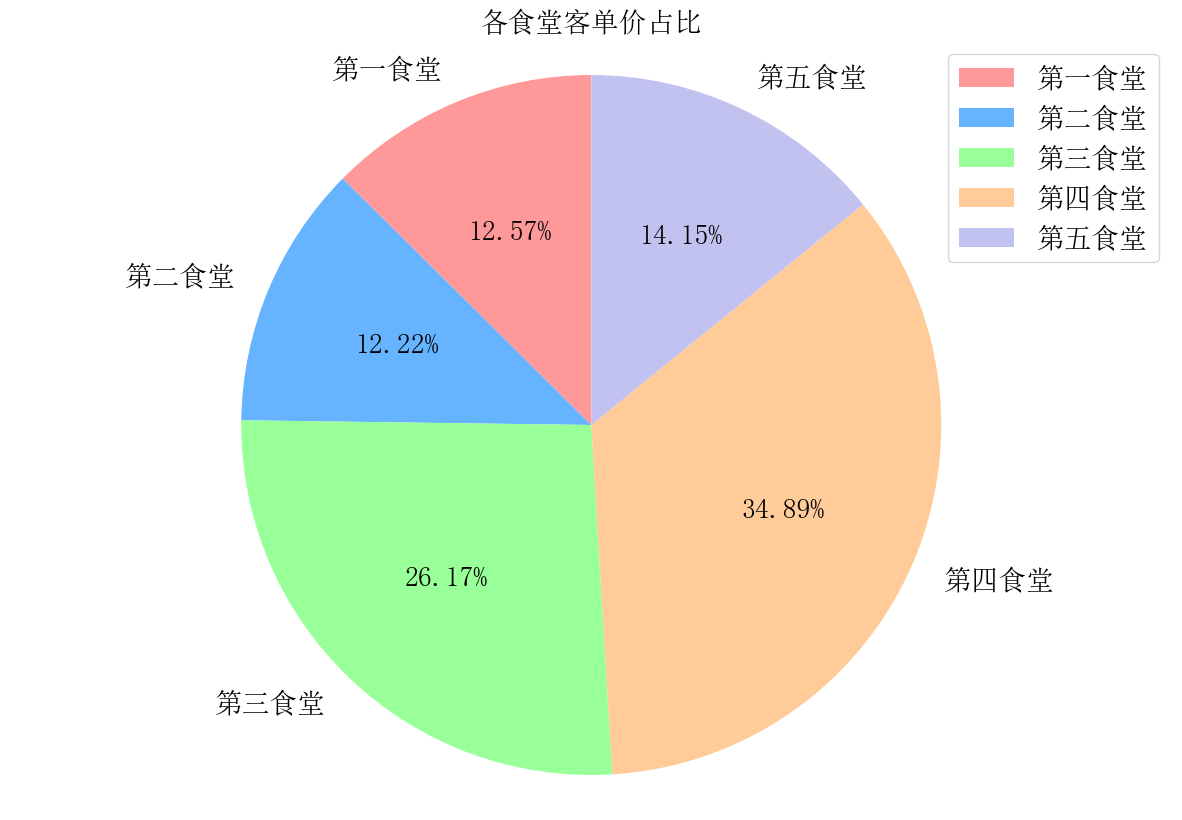

In [159]:
#创建画布
plt.figure(figsize=(15,10),dpi=50)
# 绘制饼图
plt.pie(canteen_dj, labels=canteen_dj.index, autopct='%.2f%%', shadow=False, startangle=90, textprops={'fontproperties': font}, colors=colors)
# 显示图例
plt.legend(prop=font, fontsize=20)
# 设置标题
plt.title("各食堂客单价占比", fontproperties=font)
# 保持饼图为正圆形
plt.axis('equal')
# 显示图形
plt.show()

**客单价**

食堂4和食堂3的价格显著高于别的食堂，可能存在某些特色餐饮或高端窗口

食堂2和食堂5的客单价低，且流量也高，适合作为基础餐饮的供应主力



### 工作日消费曲线图

通过食堂刷卡记录，分别绘制工作日和非工作日食堂就餐时间曲线图，分析食堂早中晚餐的就餐峰值，并在报告中进行描述

In [59]:
data.dtypes

序号          int64
校园卡号        int64
性别         object
专业名称       object
门禁卡号        int64
流水号       float64
校园卡编号     float64
消费时间       object
消费金额      float64
存储金额      float64
余额        float64
消费次数      float64
消费类型       object
消费项目编码    float64
操作编码      float64
消费地点       object
dtype: object

In [60]:
#对data中消费时间数据进行时间格式的转换，转换后可以运算
data['消费时间'] = pd.to_datetime(data['消费时间'], format="%Y-%m-%d %H:%M:%S", errors='coerce')
data.dtypes

序号                 int64
校园卡号               int64
性别                object
专业名称              object
门禁卡号               int64
流水号              float64
校园卡编号            float64
消费时间      datetime64[ns]
消费金额             float64
存储金额             float64
余额               float64
消费次数             float64
消费类型              object
消费项目编码           float64
操作编码             float64
消费地点              object
dtype: object

In [61]:
#创建一个消费星期列，由消费时间计算出消费时间是星期几
#1为星期一，7为星期日
data['消费星期']=data['消费时间'].dt.dayofweek + 1
data.head(3)

,序号,校园卡号,性别,专业名称,门禁卡号,流水号,校园卡编号,消费时间,消费金额,存储金额,余额,消费次数,消费类型,消费项目编码,操作编码,消费地点,消费星期
0,1,180001,男,18国际金融,19762330,117331517.0,20181.0,2019-04-21 18:30:00,7.0,0.0,28.4,206.0,消费,41.0,249.0,第四食堂,7
1,1,180001,男,18国际金融,19762330,117341866.0,20181.0,2019-04-22 09:40:00,3.5,0.0,24.9,207.0,消费,19.0,236.0,第一食堂,1
2,1,180001,男,18国际金融,19762330,117154618.0,20181.0,2019-04-10 16:42:00,11.0,0.0,2.7,189.0,消费,82.0,18.0,第四食堂,3


In [68]:
#将周一到周五分为工作日，拆分为工作日和非工作日
work_day_query = data.loc[:,'消费星期'] <= 5
unwork_day_query = data.loc[:,'消费星期'] > 5
work_day_data = data.loc[work_day_query,:]
unwork_day_data = data.loc[unwork_day_query,:]

In [140]:
#计算工作日消费时间对应的各时间的消费总次数
work_day_times=[]
for i in range(24):
    # 提取小时部分，并计算每个小时的消费次数
    hour_query = work_day_data['消费时间'].dt.hour == i
    work_day_times.append(hour_query.sum())

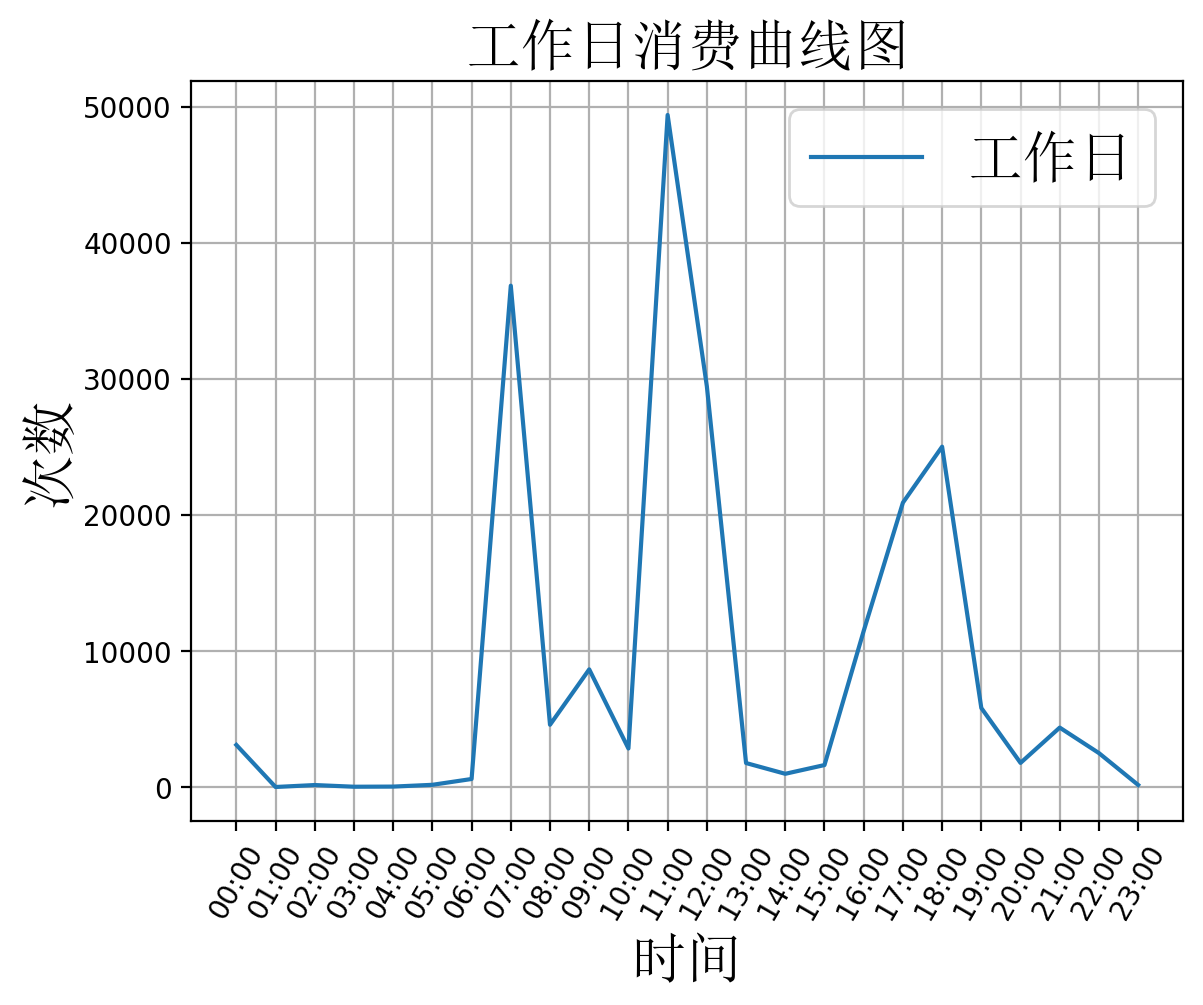

In [73]:
#以时间段作为x轴，同一时间段出现的次数和作为y轴，作曲线图
x=[]
for i in range(24):
    x.append('{:02d}:00'.format(i))
#绘图
plt.plot(x,work_day_times,label='工作日')
#x,y轴标签
plt.xlabel('时间',fontproperties=font)
plt.ylabel('次数',fontproperties=font)
#标签
plt.title("工作日消费曲线图",fontproperties=font)
plt.legend(prop=font)
#将x轴的标签斜倾
plt.xticks(rotation=60)
plt.grid()
plt.show()

**工作日高峰时段**

**早餐**：8:00(36850次)、9:00(4594次)

**午餐**：11:00(49390次)、12:00(29460次)

**晚餐**：17：00-19：00(其中17:00-25024次，18:00-5827次)

### 非工作日消费曲线图

In [142]:
#计算工作日消费时间对应的各时间的消费总次数
unwork_day_times=[]
for i in range(24):
    # 提取小时部分，并计算每个小时的消费次数
    hour_query = unwork_day_data['消费时间'].dt.hour == i
    unwork_day_times.append(hour_query.sum())

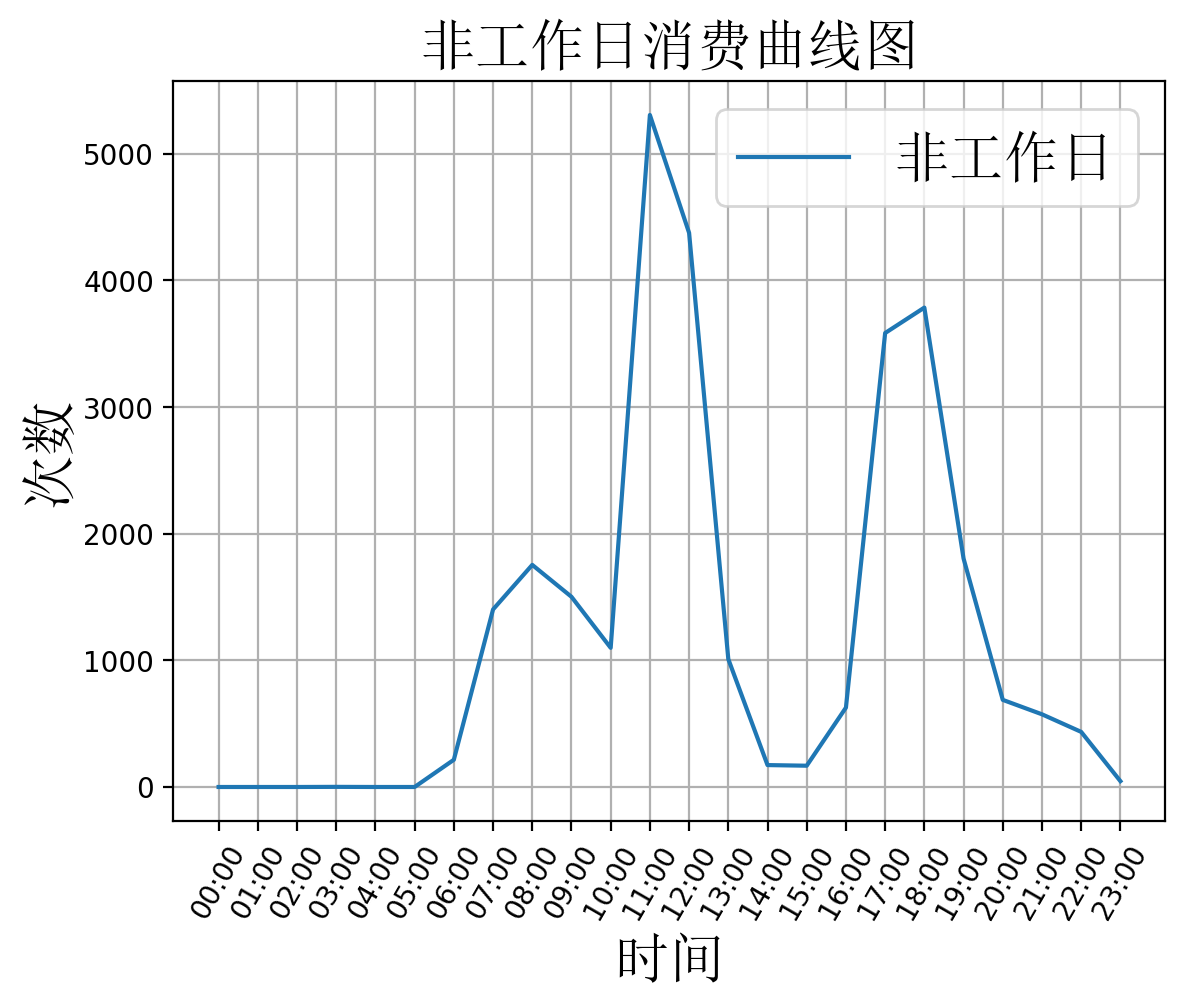

In [75]:
#以时间段作为x轴，同一时间段出现的次数和作为y轴，作曲线图
x=[]
for i in range(24):
    x.append('{:02d}:00'.format(i))
#绘图
plt.plot(x,unwork_day_times,label='非工作日')
#x,y轴标签
plt.xlabel('时间',fontproperties=font)
plt.ylabel('次数',fontproperties=font)
#标签
plt.title("非工作日消费曲线图",fontproperties=font)
plt.legend(prop=font)
#将x轴的标签斜倾
plt.xticks(rotation=60)
plt.grid()
plt.show()

**非工作日高峰时段**

**早餐**：9:00-10:00(1754次)

**午餐**：11:00-12:00(5307次)

**晚餐**：18:00(3786次)

### 工作日和非工作日消费对比

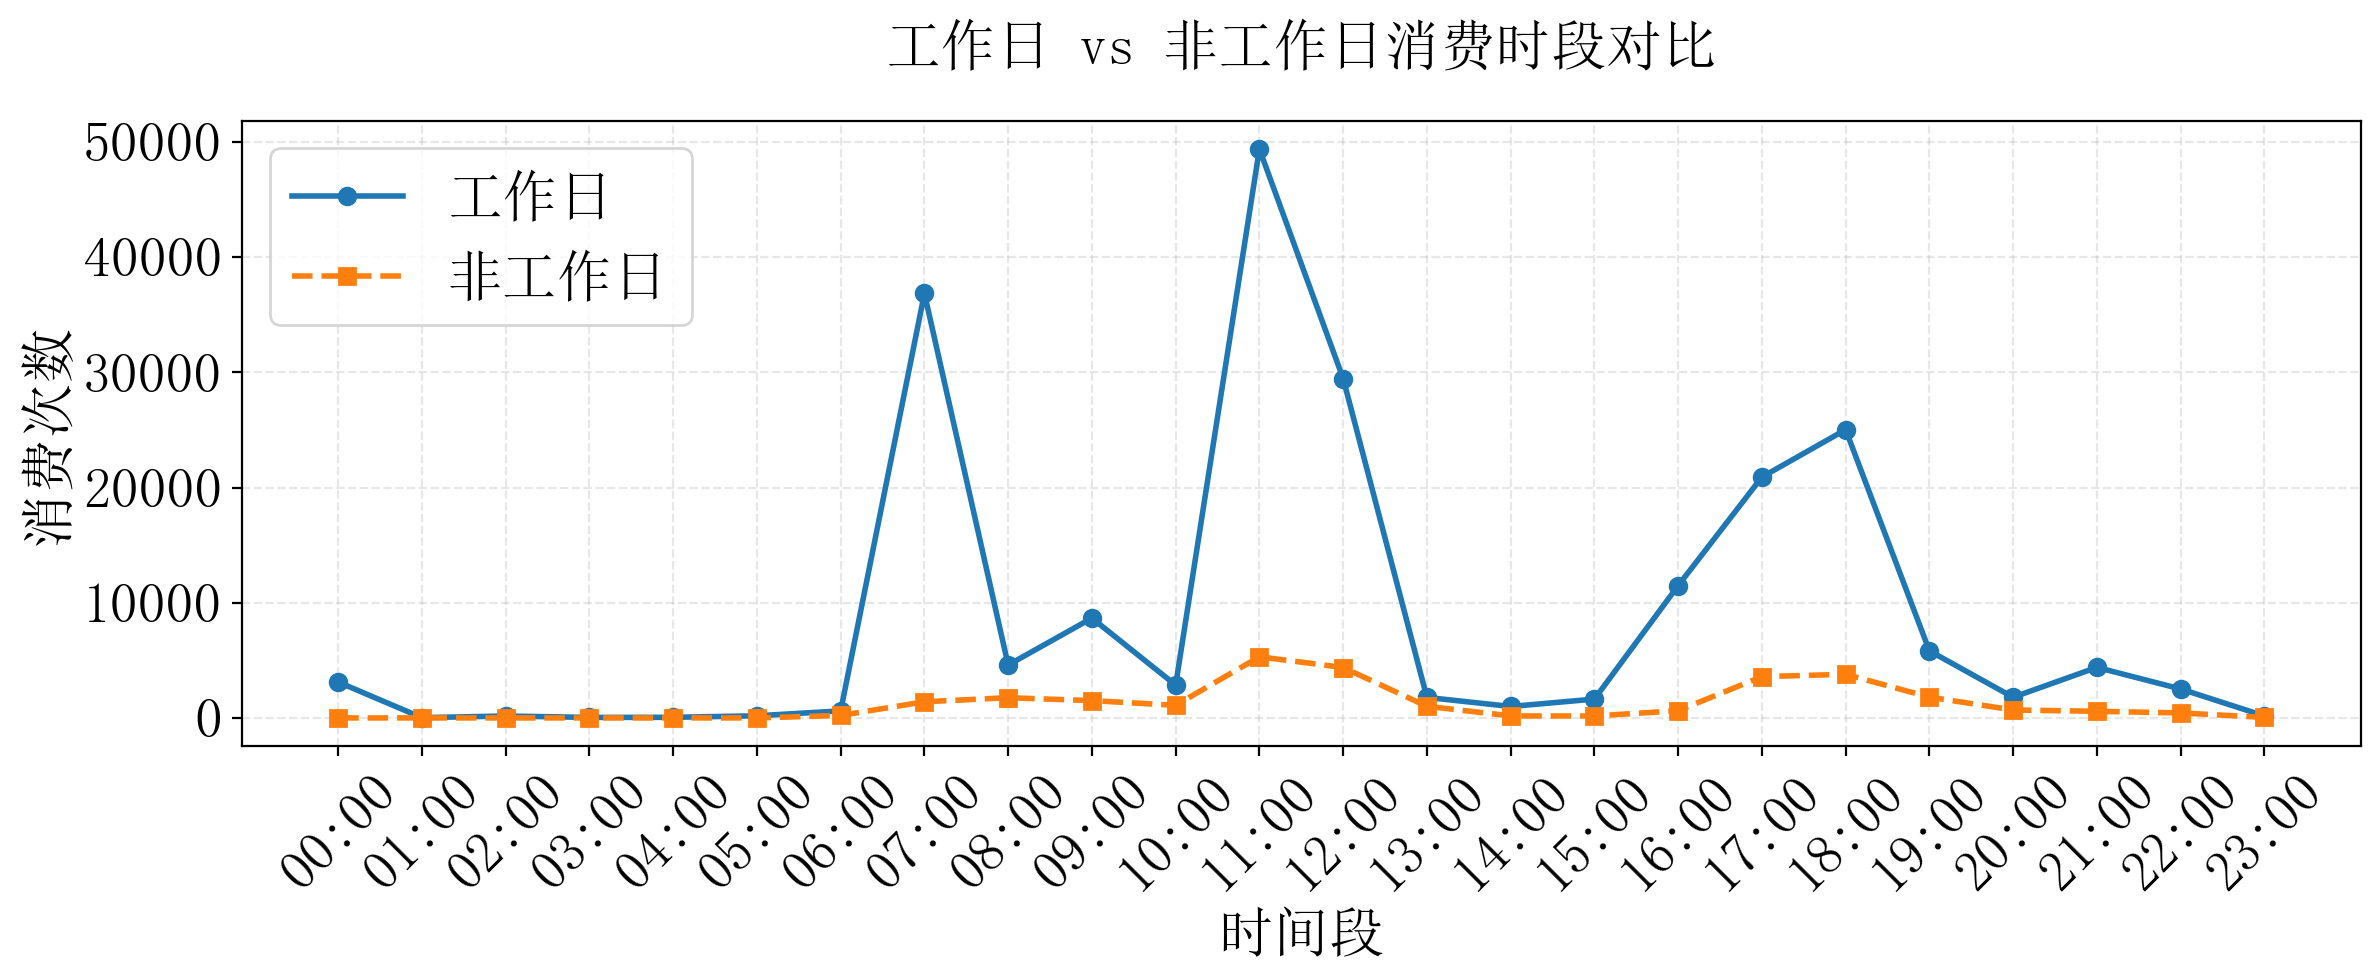

In [168]:
# 设置画布尺寸
plt.figure(figsize=(12,5))

# 合并绘制双折线
plt.plot(x, work_day_times, label='工作日', color='#1f77b4', linewidth=2, marker='o')
plt.plot(x, unwork_day_times, label='非工作日', color='#ff7f0e', linewidth=2, linestyle='--', marker='s')

# 设置中文标签（假设已定义font变量）
plt.xlabel('时间段', fontproperties=font)
plt.ylabel('消费次数', fontproperties=font)
plt.title("工作日 vs 非工作日消费时段对比", fontproperties=font, pad=20)

# 优化显示细节
plt.xticks(rotation=45, fontproperties=font)
plt.yticks(fontproperties=font)
plt.legend(prop=font, loc='upper left')  # 图例放在左上方

# 设置网格和边界
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()  # 自动调整布局

# 突出显示高峰时段
max_work = np.argmax(work_day_times)

plt.show()

**工作日和非工作日**：工作日的整体消费以及消费高峰期都要远高于非工作日

**早餐**：非工作日的高峰较工作日延迟一个小时，且高峰远低于工作日(36850次-1754次)

**午餐**：非工作日也比工作日推迟一个小时

**晚餐**：相较与工作日，非工作日的更加分散，工作日相对比较集中

**结论与建议：**

工作日需要重点保障早餐(8:00)和午餐(11:00)的窗口效率

非工作日可以适当的推迟供餐时间，尤其是晚餐，晚餐的窗口关闭的时间可以向后推迟

### 优化建议

**（1）分流高峰压力**

食堂2和食堂5：在工作日11:00-12:00可以增加临时窗口和食堂工作人员的数量

食堂3和食堂4：针对其客单价高的特性，可以在非工作日的18:00-19:00推出套餐以及优惠，吸引非刚需的用户，吸引聚餐以及约会用户

**（2）提升低流量食堂吸引力**

食堂3：通过营销手段（优惠、免费送东西等等）提升流量，或者分析是否因为离教学楼和宿舍楼太远的原因导致的客流量较低

食堂1：对比同类同等级食堂（食堂2），优化菜品，增加菜品种类，提升性价比，吸引用户

**（3）延长非高峰时段服务**

食堂4：在5个食堂内中规中矩，可以在非工作日的下午（消费量低的时间段）提供下午茶，也可以在工作日的早上提供咖啡，从而挖掘潜在需求
